SOCIO ECONOMIC HEALTH DISPARITY

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [47]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Load NHANES datasets
# files = {
#     "DEMO_L": "SES_RAW DATA/morbidity/DEMO_L.XPT",     # Demographics
#     "DIQ_L": "SES_RAW DATA/morbidity/DIQ_L.XPT",       # Diabetes
#     "HEPA_L": "SES_RAW DATA/morbidity/HEPA_L.XPT",     # Hepatitis A
#     "HEQ_L": "SES_RAW DATA/morbidity/HEQ_L.XPT",       # Hepatitis B
#     "HOQ_L": "SES_RAW DATA/morbidity/HOQ_L.XPT",       # Housing
#     "HSQ_L": "SES_RAW DATA/morbidity/HSQ_L.XPT",       # HIV
#     "INQ_L": "SES_RAW DATA/morbidity/INQ_L.XPT",       # Total Savings
#     "KIQ_U_L": "SES_RAW DATA/morbidity/KIQ_U_L.XPT",   # Weak Failing Kidneys
#     "MCQ_L": "SES_RAW DATA/morbidity/MCQ_L.XPT",       # Disease, ..., etc.
#     "OCQ_L": "SES_RAW DATA/morbidity/OCQ_L.XPT",       # Occupational
#     "RXQ_RX_L": "SES_RAW DATA/morbidity/RXQ_RX_L.XPT", # Taken Prescription Medicine
# }

# dataframes = {name: pd.read_sas(f"{filename}", format="xport") for name, filename in files.items()}

# # Merge datasets on 'SEQN'
# df = dataframes["DEMO_L"]
# for name, df_other in dataframes.items():
#     if name != "DEMO_L":
#         df = df.merge(df_other, on="SEQN", how="inner")

# # Select relevant columns
# selected_columns = [
#     "SEQN", "RIDAGEYR", "RIAGENDR", "DMDEDUC2", "INDFMPIR",  # Demographics (DEMO_L)
#     "IND310", # Total savings (INQ_L)
#     # "OCD150",  # Occupational (OCQ_L)
#     "HOD051", # Housing (HOQ_L)
#     "DIQ010", # Diabetes (DIQ_L)
#     "MCQ010", "MCQ160B", "MCQ160C", "MCQ160E", "MCQ160M", "MCQ160P", "MCQ160L", "MCQ550", "MCQ220", # Disease (MCQ_L) 
#     "HSQ590", # HIV (HSQ_L)
#     "LBXHA", # Hepatitis A (HEPA_L)
#     "HEQ010", # Hepatitis B (HEQ_L)
#     "KIQ022", # Kidney (KIQ_U_L)
#     "RXQ033" # Prescription (RXQ_RX_L)
# ]
# df = df[[col for col in selected_columns if col in df.columns]]

# # Convert non-numeric columns to NaN before computing median
# for col in df.columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# # Handle missing values: Fill NaNs with column medians
# df.fillna(df.median(), inplace=True)

# # # Normalize numerical features for clustering
# # numeric_features = ["BMXBMI", "BMXWAIST", "BPXSY1", "BPXDI1", "LBXGLU", "LBXINS", "LBXHSCRP", "LBXTC"]
# # numeric_features = [col for col in numeric_features if col in df.columns]
# # scaler = StandardScaler()
# # df[numeric_features] = scaler.fit_transform(df[numeric_features])

# # Save final dataset
# df.to_csv("SES_RAW DATA/morbidity/NHANES_SES_RawData.csv", index=False)
# print("Final dataset saved as 'NHANES_SES_RawData.csv'")

In [48]:
file = "SES_RAW DATA/morbidity/NHANES_SES_RawData.csv"
df = pd.read_csv(file)
df.head()

,SEQN,RIDAGEYR,RIAGENDR,DMDEDUC2,INDFMPIR,IND310,HOD051,DIQ010,MCQ010,MCQ160B,...,MCQ160M,MCQ160P,MCQ160L,MCQ550,MCQ220,HSQ590,LBXHA,HEQ010,KIQ022,RXQ033
0,130378.0,43.0,1.0,5.0,5.00,1.0,10.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,130379.0,66.0,1.0,5.0,5.00,1.0,9.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
2,130380.0,44.0,2.0,3.0,1.41,1.0,6.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,130386.0,34.0,1.0,4.0,1.33,2.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
4,130387.0,68.0,2.0,5.0,1.32,1.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0


In [49]:
df.columns

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'DMDEDUC2', 'INDFMPIR', 'IND310',
       'HOD051', 'DIQ010', 'MCQ010', 'MCQ160B', 'MCQ160C', 'MCQ160E',
       'MCQ160M', 'MCQ160P', 'MCQ160L', 'MCQ550', 'MCQ220', 'HSQ590', 'LBXHA',
       'HEQ010', 'KIQ022', 'RXQ033'],
      dtype='object')

In [50]:
# rename columns
df.columns = ['SEQN',
    'Age', 'Gender', 'Education', 'FamilyIncomeRatio', # Demographics
    'TotalSavings', # Total Savings
    # 'Occupation', # Occupational
    'Housing', # Housing
    'Diabetes', # Diabetes
    'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack', 
    'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 'CancerOrMalignancy', # Disease
    'HIV', # HIV
    'HepatitisA', # Hepatitis A
    'HepatitisB', # Hepatitis B
    'WeakFailingKidney', # Kidney
    'TakenPrescriptionMedicine' # Prescription
]

df.head()

,SEQN,Age,Gender,Education,FamilyIncomeRatio,TotalSavings,Housing,Diabetes,Asthma,CongestiveHeartFailure,...,ThyroidProblem,Emphysema,LiverCondition,Gallstone,CancerOrMalignancy,HIV,HepatitisA,HepatitisB,WeakFailingKidney,TakenPrescriptionMedicine
0,130378.0,43.0,1.0,5.0,5.00,1.0,10.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,130379.0,66.0,1.0,5.0,5.00,1.0,9.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
2,130380.0,44.0,2.0,3.0,1.41,1.0,6.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,130386.0,34.0,1.0,4.0,1.33,2.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
4,130387.0,68.0,2.0,5.0,1.32,1.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       6064 non-null   float64
 1   Age                        6064 non-null   float64
 2   Gender                     6064 non-null   float64
 3   Education                  6064 non-null   float64
 4   FamilyIncomeRatio          6064 non-null   float64
 5   TotalSavings               6064 non-null   float64
 6   Housing                    6064 non-null   float64
 7   Diabetes                   6064 non-null   float64
 8   Asthma                     6064 non-null   float64
 9   CongestiveHeartFailure     6064 non-null   float64
 10  CoronaryHeartDisease       6064 non-null   float64
 11  HeartAttack                6064 non-null   float64
 12  ThyroidProblem             6064 non-null   float64
 13  Emphysema                  6064 non-null   float

In [52]:
df.describe()

,SEQN,Age,Gender,Education,FamilyIncomeRatio,TotalSavings,Housing,Diabetes,Asthma,CongestiveHeartFailure,...,ThyroidProblem,Emphysema,LiverCondition,Gallstone,CancerOrMalignancy,HIV,HepatitisA,HepatitisB,WeakFailingKidney,TakenPrescriptionMedicine
count,6064.000000,6064.000000,6064.000000,6064.000000,6.064000e+03,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,...,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000
mean,136346.300132,53.850099,1.551451,3.839380,2.906971e+00,2.137533,5.695086,1.893305,1.824703,1.967843,...,1.875495,1.937500,1.952342,1.905508,1.856530,1.743734,1.618734,2.017645,1.974604,1.307058
std,3437.864592,17.183330,0.497387,1.144338,1.543564e+00,8.780322,4.572527,0.410156,0.457434,0.338017,...,0.464295,0.388545,0.365335,0.453487,0.417176,0.510125,0.497149,0.486179,0.355464,0.523292
min,130378.000000,20.000000,1.000000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,133335.500000,39.000000,1.000000,3.000000,1.620000e+00,1.000000,4.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000
50%,136391.000000,57.000000,2.000000,4.000000,2.820000e+00,1.000000,5.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,139304.250000,68.000000,2.000000,5.000000,4.560000e+00,1.000000,7.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,142310.000000,80.000000,2.000000,9.000000,5.000000e+00,99.000000,99.000000,3.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000,9.000000,9.000000,9.000000


In [53]:
# display the number for each unique values for each disease

disease_columns = ['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack',
                   'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 'CancerOrMalignancy', 'HIV',
                     'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 'TakenPrescriptionMedicine']

for col in disease_columns:
    print(df[col].value_counts(), '\n')


Diabetes
2.0    4975
1.0     868
3.0     221
Name: count, dtype: int64 

Asthma
2.0    4945
1.0    1112
9.0       7
Name: count, dtype: int64 

CongestiveHeartFailure
2.0    5797
1.0     258
9.0       9
Name: count, dtype: int64 

CoronaryHeartDisease
2.0    5718
1.0     322
9.0      24
Name: count, dtype: int64 

HeartAttack
2.0    5794
1.0     261
9.0       9
Name: count, dtype: int64 

ThyroidProblem
2.0    5215
1.0     837
9.0      11
7.0       1
Name: count, dtype: int64 

Emphysema
2.0    5605
1.0     449
9.0      10
Name: count, dtype: int64 

LiverCondition
2.0    5697
1.0     357
9.0       9
7.0       1
Name: count, dtype: int64 

Gallstone
2.0    5387
1.0     664
9.0      13
Name: count, dtype: int64 

CancerOrMalignancy
2.0    5148
1.0     910
9.0       5
7.0       1
Name: count, dtype: int64 

HIV
2.0    4448
1.0    1608
9.0       7
7.0       1
Name: count, dtype: int64 

HepatitisA
2.0    3684
1.0    2346
3.0      34
Name: count, dtype: int64 

HepatitisB
2.0    5949
1.0  

In [54]:
# make the non value for 1 or 2 to NaN in desease columns

for col in disease_columns:
    df[col] = df[col].replace({3: np.nan, 7: np.nan, 9: np.nan})
    print(df[col].value_counts(), '\n')

# make the 1 to 0 and 2 to 1 in diseases column

for col in disease_columns:
    df[col] = df[col].replace({2: 0})



Diabetes
2.0    4975
1.0     868
Name: count, dtype: int64 

Asthma
2.0    4945
1.0    1112
Name: count, dtype: int64 

CongestiveHeartFailure
2.0    5797
1.0     258
Name: count, dtype: int64 

CoronaryHeartDisease
2.0    5718
1.0     322
Name: count, dtype: int64 

HeartAttack
2.0    5794
1.0     261
Name: count, dtype: int64 

ThyroidProblem
2.0    5215
1.0     837
Name: count, dtype: int64 

Emphysema
2.0    5605
1.0     449
Name: count, dtype: int64 

LiverCondition
2.0    5697
1.0     357
Name: count, dtype: int64 

Gallstone
2.0    5387
1.0     664
Name: count, dtype: int64 

CancerOrMalignancy
2.0    5148
1.0     910
Name: count, dtype: int64 

HIV
2.0    4448
1.0    1608
Name: count, dtype: int64 

HepatitisA
2.0    3684
1.0    2346
Name: count, dtype: int64 

HepatitisB
2.0    5949
1.0      87
Name: count, dtype: int64 

WeakFailingKidney
2.0    5822
1.0     231
Name: count, dtype: int64 

TakenPrescriptionMedicine
1.0    4252
2.0    1804
Name: count, dtype: int64 



In [55]:
# df['TotalSavings'] = df['TotalSavings'].replace({77: np.nan, 99: np.nan})
df[['Education', 'Housing', 'TotalSavings']] = df[['Education', 'Housing', 'TotalSavings']].replace({7: np.nan, 9: np.nan, 77: np.nan, 99: np.nan})

In [56]:
# fill the NaN values with the median of the column
df.fillna(df.mode(), inplace=True)

In [57]:
for col in df.columns:
    print(df[col].value_counts(), '\n')

SEQN
130378.0    1
138296.0    1
138316.0    1
138315.0    1
138311.0    1
           ..
134383.0    1
134382.0    1
134381.0    1
134380.0    1
142310.0    1
Name: count, Length: 6064, dtype: int64 

Age
80.0    342
68.0    164
62.0    158
60.0    157
61.0    157
       ... 
23.0     62
26.0     61
22.0     59
78.0     54
20.0     53
Name: count, Length: 61, dtype: int64 

Gender
2.0    3344
1.0    2720
Name: count, dtype: int64 

Education
5.0    2143
4.0    1846
3.0    1297
2.0     482
1.0     292
Name: count, dtype: int64 

FamilyIncomeRatio
5.000000e+00    1328
2.820000e+00     804
5.397605e-79      52
3.280000e+00      37
7.400000e-01      33
                ... 
4.080000e+00       1
1.500000e+00       1
4.950000e+00       1
3.610000e+00       1
4.730000e+00       1
Name: count, Length: 462, dtype: int64 

TotalSavings
1.0    5218
2.0     270
3.0     247
4.0     178
5.0      92
Name: count, dtype: int64 

Housing
5.0     1584
6.0     1027
4.0      973
3.0      560
8.0      489
2.

In [58]:
df.columns

Index(['SEQN', 'Age', 'Gender', 'Education', 'FamilyIncomeRatio',
       'TotalSavings', 'Housing', 'Diabetes', 'Asthma',
       'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack',
       'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone',
       'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB',
       'WeakFailingKidney', 'TakenPrescriptionMedicine'],
      dtype='object')

In [59]:
#Creating a new column called SES_Score which is the sum of the SES columns

df["SES_Score"] = df[["TotalSavings", "Education", "FamilyIncomeRatio", "Housing"]].sum(axis=1)

df.drop(columns=["TotalSavings", "Education", "FamilyIncomeRatio", "Housing"], inplace=True)

In [60]:
# try to group the diseases features into one

# Sum all disease-related columns to create a health score
df['HealthIndicator'] = df[['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
                            'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
                            'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 
                            'TakenPrescriptionMedicine']].sum(axis=1)

# Drop individual disease columns to avoid redundancy
df = df.drop(columns=['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
                      'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
                      'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 
                      'TakenPrescriptionMedicine'])


In [61]:
# # use get_dummies to convert the disease columns to binary columns
# df = pd.get_dummies(df, columns=disease_columns, drop_first=True)


In [62]:
df.head()

,SEQN,Age,Gender,SES_Score,HealthIndicator
0,130378.0,43.0,1.0,21.00,2.0
1,130379.0,66.0,1.0,11.00,3.0
2,130380.0,44.0,2.0,11.41,5.0
3,130386.0,34.0,1.0,10.33,1.0
4,130387.0,68.0,2.0,7.32,2.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEQN             6064 non-null   float64
 1   Age              6064 non-null   float64
 2   Gender           6064 non-null   float64
 3   SES_Score        6064 non-null   float64
 4   HealthIndicator  6064 non-null   float64
dtypes: float64(5)
memory usage: 237.0 KB


In [64]:
df.drop(columns=['SEQN', 'Age', 'Gender'], inplace=True)

In [65]:
# use standard scaler to scale the data

# scaler = StandardScaler()
df_scaled = df.copy()
# df_scaled = scaler.fit_transform(df_scaled)

In [66]:
# df_scaled.describe()

In [67]:
# df_scaled.head()

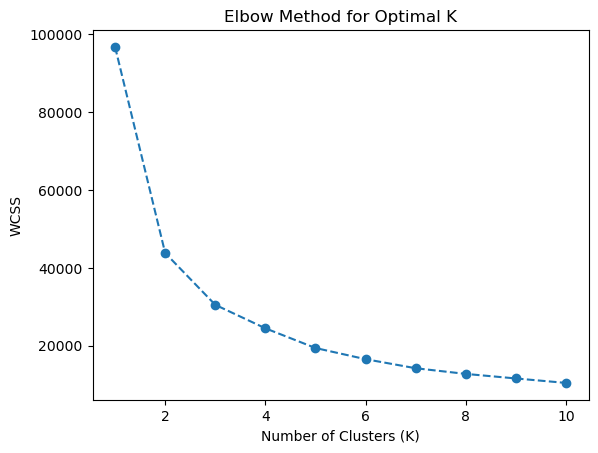

In [68]:
# try elbow method
 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)  # Use the standardized data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [75]:
kmeans = KMeans(n_clusters=2, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

In [76]:
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(df_scaled.drop(columns=['cluster']))

# df_scaled['PCA1'] = pca_result[:, 0]
# df_scaled['PCA2'] = pca_result[:, 1]
# # df_scaled['PCA3'] = pca_result[:, 2]

In [77]:
df_scaled.head(10)

,SES_Score,HealthIndicator,cluster
0,21.00,2.0,0
1,11.00,3.0,1
2,11.41,5.0,1
3,10.33,1.0,1
4,7.32,2.0,1
5,11.81,0.0,1
6,14.00,1.0,0
7,12.16,2.0,1
8,9.93,2.0,1
9,17.04,3.0,0


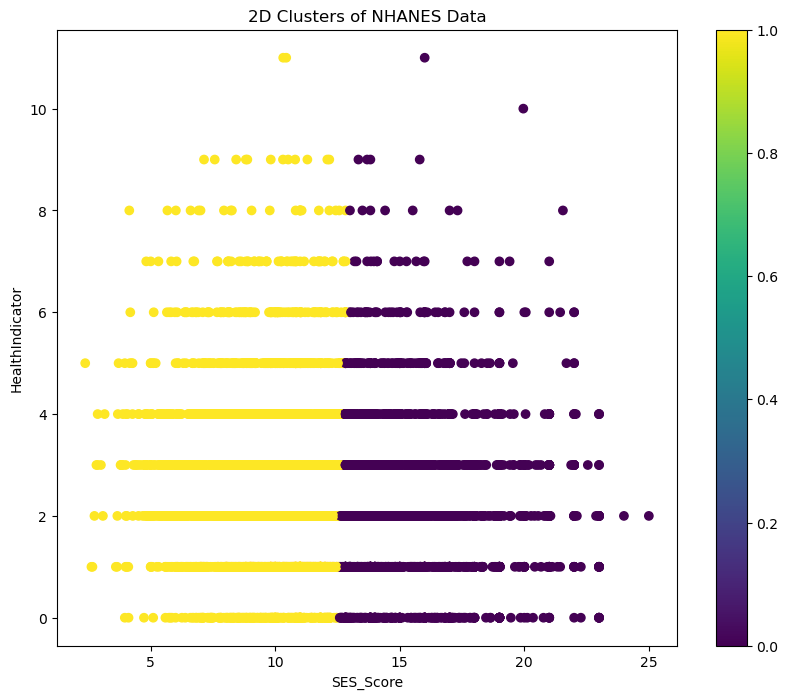

In [78]:
# Visualize Clusters in 3D
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# sc = ax.scatter(df_scaled['PCA1'], df_scaled['PCA2'], df_scaled['PCA3'], c=df_scaled['cluster'], cmap='viridis')
# ax.set_xlabel("PCA1")
# ax.set_ylabel("PCA2")
# ax.set_zlabel("PCA3")
# plt.title("3D Clusters of NHANES Data")
# plt.colorbar(sc)
# plt.show()

# Visualize Clusters in 2D
plt.figure(figsize=(10, 8))
plt.scatter(df_scaled['SES_Score'], df_scaled['HealthIndicator'], c=df_scaled['cluster'], cmap='viridis')
plt.xlabel("SES_Score")
plt.ylabel("HealthIndicator")
plt.title("2D Clusters of NHANES Data")
plt.colorbar()
plt.show()

In [79]:
# get the silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df_scaled, df_scaled['cluster'])


0.4686481344288866

### Plot cluster to each diseases

In [80]:
# plot each disease against the cluster

# Create a new DataFrame for plotting
df_plot = df_scaled[['cluster']].copy()

# # Add disease columns to the plotting DataFrame
# desease_columns = ['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
#                       'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
#                       'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 
#                       'TakenPrescriptionMedicine']

df_plot[disease_columns] = df[disease_columns]

# Plot each disease against the cluster
for disease in disease_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=disease, data=df_plot)
    plt.title(f'Cluster vs {disease}')
    plt.show()


KeyError: "None of [Index(['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease',\n       'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition',\n       'Gallstone', 'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB',\n       'WeakFailingKidney', 'TakenPrescriptionMedicine'],\n      dtype='object')] are in the [columns]"